# Data Processing

Import libraries and dataframe

In [ ]:
#pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output

url = 'https://drive.google.com/file/d/1-0exaTj91_tdZ8IxIH0esLd1ty0Uyd6I/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url)

dir = '/content/drive/MyDrive/CS180/Project/CS180_Project_cbragunton_jtderez/IMPLEMENTATION'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/CS180/Project/CS180_Project_cbragunton_jtderez/IMPLEMENTATION

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CS180/Project/CS180_Project_cbragunton_jtderez/IMPLEMENTATION


In [ ]:
print(df1.head(10))

   Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count   highest  \
0         82.53          76.0          51.0         8.0       322.0  NA_Sales   
1         35.52          82.0          73.0         8.3       709.0  NA_Sales   
2         32.77          80.0          73.0         8.0       192.0  NA_Sales   
3         29.80          89.0          65.0         8.5       431.0  NA_Sales   
4         28.92          58.0          41.0         6.6       129.0  NA_Sales   
5         28.32          87.0          80.0         8.4       594.0  NA_Sales   
6         23.21          91.0          64.0         8.6       464.0  NA_Sales   
7         22.70          80.0          63.0         7.7       146.0  NA_Sales   
8         21.81          61.0          45.0         6.3       106.0  NA_Sales   
9         21.79          80.0          33.0         7.4        52.0  NA_Sales   

        lowest  Platform_2600  Platform_3DO  Platform_3DS  ...  Developer_nan  \
0     JP_Sales            0

# Model 1: DecisionTreeClassifier

DecisionTreeClassifier from sklearn

Splitting Train, Validation, and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
X1 = df1.drop(['highest','lowest'], axis=1)
lo1 = df1['lowest']
hi1 = df1['highest']

# Split data into train, validation, and test sets
#for highest

X1_train, X1_test, hi1_train, hi1_test = train_test_split(X1, hi1, test_size=0.2, random_state=427)

#for lowest
X1_train, X1_test, lo1_train, lo1_test = train_test_split(X1, lo1, test_size=0.2, random_state=427)

Implementing Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

#for highest
clf = DecisionTreeClassifier(random_state=427)
clf = clf.fit(X1_train,hi1_train)
hi1_pred = clf.predict(X1_test)
accuracy = accuracy_score(hi1_test, hi1_pred)
report = classification_report(hi1_test, hi1_pred)
print('Highest Region')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

#for lowest
clf = DecisionTreeClassifier(random_state=427)
clf = clf.fit(X1_train,lo1_train)
lo1_pred = clf.predict(X1_test)
accuracy = accuracy_score(lo1_test, lo1_pred)
report = classification_report(lo1_test, lo1_pred)
print('Lowest Region')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Highest Region
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

    EU_Sales       0.66      0.60      0.63       275
    JP_Sales       0.40      0.34      0.37        91
    NA_Sales       0.85      0.89      0.87       989
 Other_Sales       0.33      0.10      0.15        10

    accuracy                           0.79      1365
   macro avg       0.56      0.48      0.50      1365
weighted avg       0.78      0.79      0.78      1365

Lowest Region
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

    EU_Sales       0.54      0.55      0.54       207
    JP_Sales       0.85      0.84      0.84       891
    NA_Sales       0.62      0.59      0.61       132
 Other_Sales       0.53      0.58      0.55       135

    accuracy                           0.75      1365
   macro avg       0.63      0.64      0.64      1365
weighted avg       0.75      0.75      0.75      1365



Hyperparameter Tuning for DecisionTree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# for highest
dtree_clf = DecisionTreeClassifier(random_state=427) # Initialize a decision tree
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted')
grid_search.fit(X1_train, hi1_train)
best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
best_params_hi1 = grid_search.best_params_
print(f"Highest Best parameters: {best_params_hi1}")

# for lowest
dtree_clf = DecisionTreeClassifier(random_state=427) # Initialize a decision tree
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted')
grid_search.fit(X1_train, lo1_train)
best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
best_params_lo1 = grid_search.best_params_
print(f"Lowest Best parameters: {best_params_lo1}")

# Highest Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
# Lowest Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Highest Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Lowest Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Reimplementing DecisionTreeClassifier with Best Parameters

In [ ]:
# hyperparameter tuning results are already included
from joblib import Parallel, delayed
import joblib


#for highest
clf = DecisionTreeClassifier(**best_params_hi1, random_state=427)
#clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=427)
clf = clf.fit(X1_train,hi1_train)
hi1_pred = clf.predict(X1_test)
accuracy = accuracy_score(hi1_test, hi1_pred)
report = classification_report(hi1_test, hi1_pred)
print('Highest Region with Best Parameters')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

#saving model
#joblib.dump(clf, dir + '/Highest_Region_DecisionTreeClassifier.pkl')


#for lowest
clf = DecisionTreeClassifier(**best_params_lo1, random_state=427)
#clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=427)
clf = clf.fit(X1_train,lo1_train)
lo1_pred = clf.predict(X1_test)
accuracy = accuracy_score(lo1_test, lo1_pred)
report = classification_report(lo1_test, lo1_pred)
print('Highest Region with Best Parameters')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

#saving model
#joblib.dump(clf, dir + '/Lowest_Region_DecisionTreeClassifier.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Highest Region with Best Parameters
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

    EU_Sales       0.76      0.56      0.64       275
    JP_Sales       0.61      0.31      0.41        91
    NA_Sales       0.83      0.94      0.88       989
 Other_Sales       0.00      0.00      0.00        10

    accuracy                           0.81      1365
   macro avg       0.55      0.45      0.48      1365
weighted avg       0.80      0.81      0.80      1365

Highest Region with Best Parameters
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

    EU_Sales       0.54      0.55      0.54       207
    JP_Sales       0.85      0.84      0.84       891
    NA_Sales       0.62      0.59      0.61       132
 Other_Sales       0.53      0.58      0.55       135

    accuracy                           0.75      1365
   macro avg       0.63      0.64      0.64      1365
weighted avg       0.75      0.75    

Visualizing Decision Trees

In [ ]:
!pip install graphviz

Visualizing Highest Game Sales

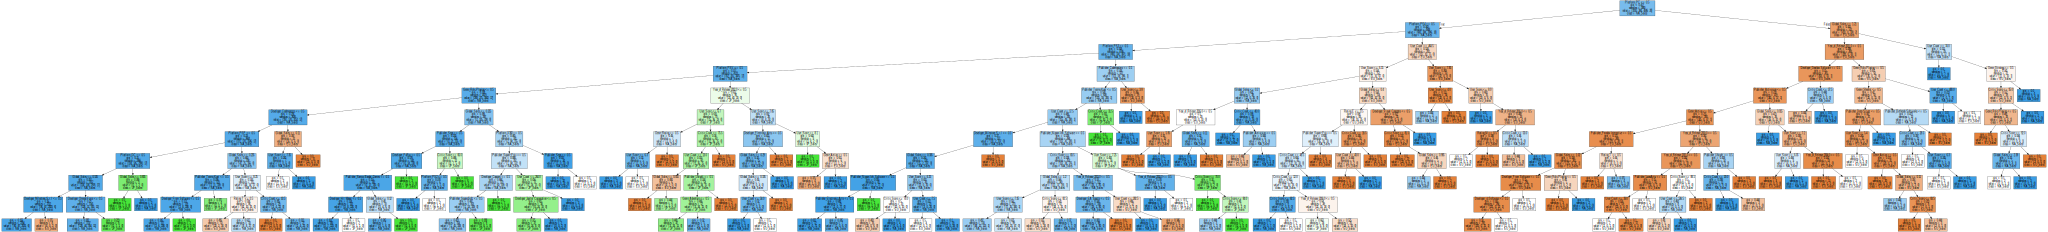

In [ ]:
from sklearn import tree
#for highest
clf = DecisionTreeClassifier(**best_params_hi1, random_state=427)
clf = clf.fit(X1_train,hi1_train)
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X1_train.columns.values,
                                class_names=["EU_Sales", "JP_Sales", "NA_Sales", "Other_Sales"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.format = "png"
graph.render("highest_decision_tree")
graph

Visualizing Lowest Game Sales

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.700329 to fit


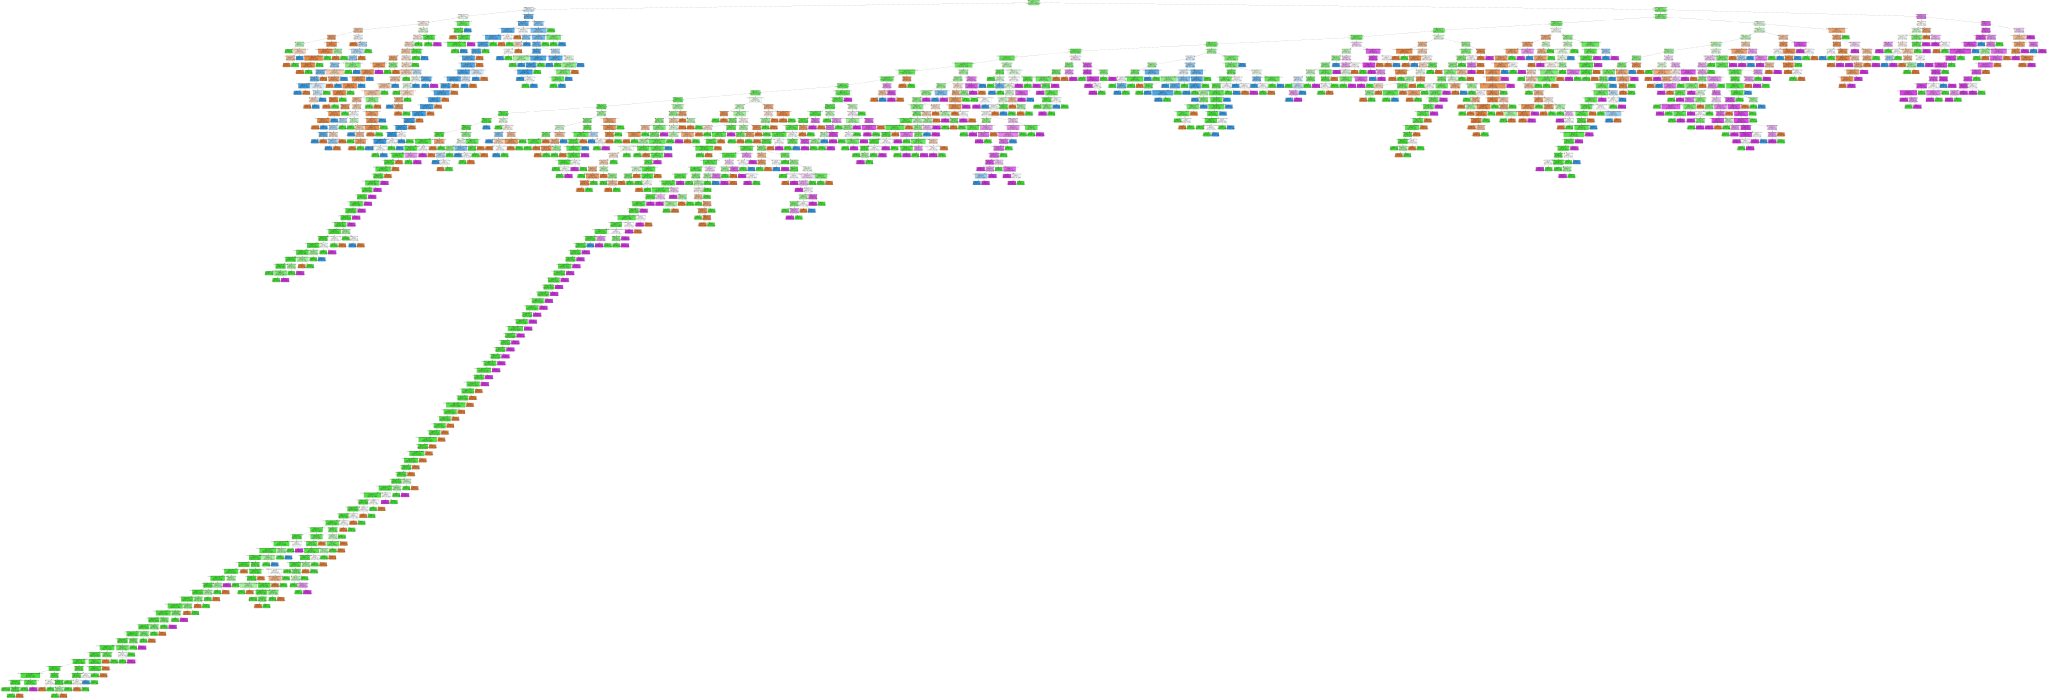

In [ ]:

from sklearn import tree
#for lowest
clf = DecisionTreeClassifier(**best_params_lo1, random_state=427)
clf = clf.fit(X1_train,lo1_train)
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X1_train.columns.values,
                                class_names=["EU_Sales", "JP_Sales", "NA_Sales", "Other_Sales"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.format = "png"
graph.render("lowest_decision_tree")
graph